In [3]:
%matplotlib inline
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

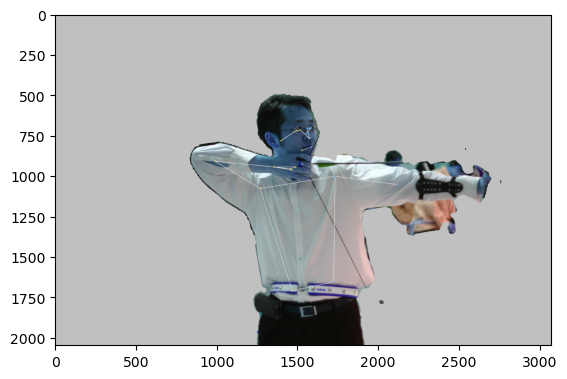

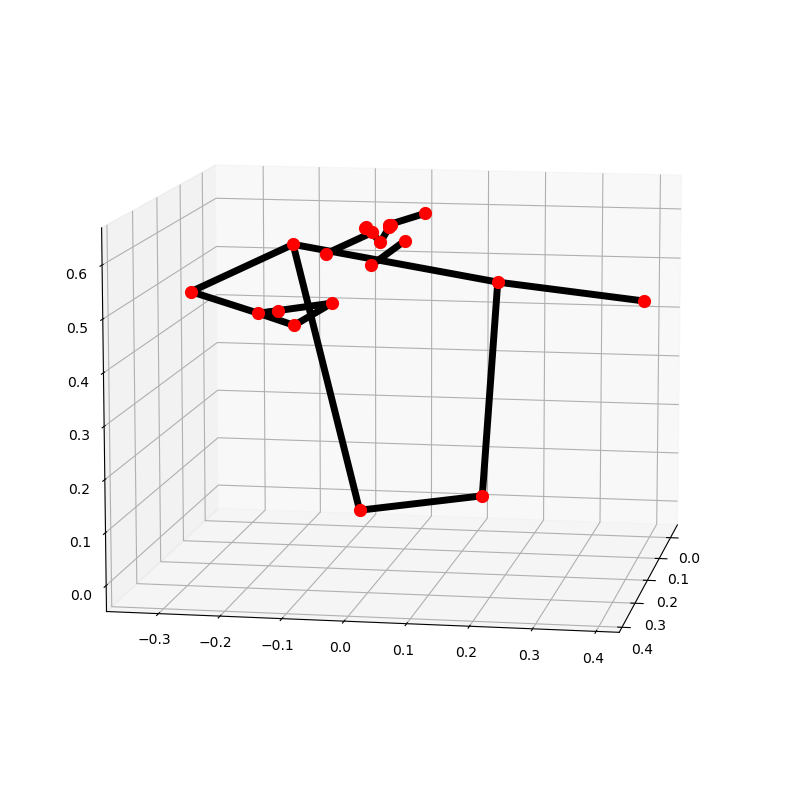

In [4]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose
BG_COLOR = (192, 192, 192) # gray
pose = mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0.5)
image = cv2.imread("./resources/image.jpg")
image_height, image_width, _ = image.shape
# Convert the BGR image to RGB before processing.
results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
annotated_image = image.copy()
# Draw segmentation on the image.
# To improve segmentation around boundaries, consider applying a joint
# bilateral filter to "results.segmentation_mask" with "image".
condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
bg_image = np.zeros(image.shape, dtype=np.uint8)
bg_image[:] = BG_COLOR
annotated_image = np.where(condition, annotated_image, bg_image)
# Draw pose landmarks on the image.
mp_drawing.draw_landmarks(
    annotated_image,
    results.pose_landmarks,
    mp_pose.POSE_CONNECTIONS,
    landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

plt.imshow(annotated_image)
plt.show()

# Plot pose world landmarks.
mp_drawing.plot_landmarks(
    results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)

### 實時抓拍

In [5]:
# For webcam input:
cap = cv2.VideoCapture(0)
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image)

    # Draw the pose annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Pose', cv2.flip(image, 1))
    if cv2.waitKey(1) == ord("q"):
      break
cap.release()

: 